In [1]:
import numpy as np
import scipy.stats as s
import pandas as pd

In [2]:
raw_data = pd.read_csv("data.csv")

In [3]:
raw_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
raw_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
raw_data.drop(labels=[raw_data.columns[0],raw_data.columns[32]],axis=1,inplace=True)

In [6]:
raw_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
raw_data['diagnosis'].replace(to_replace=['B','M'],value=[0,1],inplace=True)

In [8]:
raw_data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
C = raw_data['diagnosis']

In [10]:
C

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
539    0
540    0
541    0
542    0
543    0
544    0
545    0
546    0
547    0
548    0
549    0
550    0
551    0
552    0
553    0
554    0
555    0
556    0
557    0
558    0
559    0
560    0
561    0
562    1
563    1
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [11]:
training_data = raw_data.iloc[0:int(0.75*raw_data.shape[0])]

In [12]:
testing_data = raw_data.iloc[int(0.75*raw_data.shape[0]):]

In [13]:
training_data.drop(['diagnosis'],axis=1,inplace=True)

C:\Users\Ishi\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [14]:
training_data['bias'] = np.ones((training_data.shape[0],1))

C:\Users\Ishi\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
training_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,bias
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890,1.0
1,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902,1.0
2,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758,1.0
3,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300,1.0
4,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678,1.0
5,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,0.07613,...,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440,1.0
6,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,0.05742,...,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368,1.0
7,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,0.07451,...,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510,1.0
8,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,0.07389,...,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720,1.0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,1.0


In [16]:
C_train = C[0:int(0.75*raw_data.shape[0])]

In [17]:
C_test = C[int(0.75*raw_data.shape[0]):]

In [18]:
C_train = np.array(C_train)

In [19]:
C_test = np.array(C_test)

In [20]:
def sigmoid(previous_activation,current_thetas):
    
    dot_product = np.matmul(previous_activation,current_thetas)
    
    return 1/(1+np.exp(-dot_product))

In [21]:
neurons = [31,31,31,1]

In [22]:
l1_thetas_old = np.random.randn(neurons[0],neurons[1])

l2_thetas_old = np.random.randn(neurons[1],neurons[2])

l3_thetas_old = np.random.randn(neurons[2],neurons[3])

In [82]:
alpha = 0.001

epsilon = 0.0001

i = 0

batch_size = 32

neg_log_likeli_history = [0]

iterations = [0]

while(i<5000):
    
    index = np.random.randint(0,training_data.shape[0],size=(32,))
    
    l0_activation = np.array(training_data.iloc[index])
    
    l1_activation = sigmoid(l0_activation,l1_thetas_old)
    
    del1_forward = np.matmul(l0_activation.T,(l1_activation*(1-l1_activation))) 
    
    l2_activation = sigmoid(l1_activation,l2_thetas_old)
    
    del2_forward = np.matmul(l1_activation.T,(l2_activation*(1-l2_activation)))
    
    l3_activation = sigmoid(l2_activation,l3_thetas_old)
    
    del3_forward = np.matmul(l2_activation.T,(l3_activation*(1-l3_activation)))
    
    
    
    
    E = np.mean(l3_activation - C_train[index])
    
    del2_reverse = E*l3_thetas_old
    
    del1_reverse = np.matmul(l2_thetas_old,del2_reverse)
    
    
    
    
    l1_thetas_new = l1_thetas_old - alpha*(del1_forward*del1_reverse.T)
    
    l2_thetas_new = l2_thetas_old - alpha*(del2_forward*del2_reverse.T)
    
    l3_thetas_new = l3_thetas_old - alpha*(del3_forward*E)
    
    
    
    
    neg_log_likeli_old = -(np.matmul(C_train[index].T,np.log(l3_activation)) + np.matmul((1-C_train[index]).T,np.log(1-l3_activation)))
    
    neg_log_likeli_history.append(neg_log_likeli_old)
    
    i+=1
    
    iterations.append(i)
    
        
        
        
    l1_thetas_old = l1_thetas_new
    
    l2_thetas_old = l2_thetas_new
    
    l3_thetas_old = l3_thetas_new
    
    print("The value of Avg Negative Log Likelihood Loss at iteration # {} is {}".format(iterations[i],neg_log_likeli_history[i]))

The value of Avg Negative Log Likelihood Loss at iteration # 1 is [95.18885423]
The value of Avg Negative Log Likelihood Loss at iteration # 2 is [93.82485653]
The value of Avg Negative Log Likelihood Loss at iteration # 3 is [81.58159445]
The value of Avg Negative Log Likelihood Loss at iteration # 4 is [80.51055499]
The value of Avg Negative Log Likelihood Loss at iteration # 5 is [100.57792811]
The value of Avg Negative Log Likelihood Loss at iteration # 6 is [78.0886912]
The value of Avg Negative Log Likelihood Loss at iteration # 7 is [118.02683069]
The value of Avg Negative Log Likelihood Loss at iteration # 8 is [95.51837872]
The value of Avg Negative Log Likelihood Loss at iteration # 9 is [103.76025297]
The value of Avg Negative Log Likelihood Loss at iteration # 10 is [96.99231703]
The value of Avg Negative Log Likelihood Loss at iteration # 11 is [76.28263507]
The value of Avg Negative Log Likelihood Loss at iteration # 12 is [79.90403074]
The value of Avg Negative Log Likel

The value of Avg Negative Log Likelihood Loss at iteration # 161 is [22.86596578]
The value of Avg Negative Log Likelihood Loss at iteration # 162 is [22.04655224]
The value of Avg Negative Log Likelihood Loss at iteration # 163 is [21.20963406]
The value of Avg Negative Log Likelihood Loss at iteration # 164 is [23.92905847]
The value of Avg Negative Log Likelihood Loss at iteration # 165 is [21.98125524]
The value of Avg Negative Log Likelihood Loss at iteration # 166 is [21.61724084]
The value of Avg Negative Log Likelihood Loss at iteration # 167 is [21.61674992]
The value of Avg Negative Log Likelihood Loss at iteration # 168 is [21.21607179]
The value of Avg Negative Log Likelihood Loss at iteration # 169 is [20.46548087]
The value of Avg Negative Log Likelihood Loss at iteration # 170 is [19.94947867]
The value of Avg Negative Log Likelihood Loss at iteration # 171 is [19.79726458]
The value of Avg Negative Log Likelihood Loss at iteration # 172 is [22.1699806]
The value of Avg 

The value of Avg Negative Log Likelihood Loss at iteration # 271 is [21.61489212]
The value of Avg Negative Log Likelihood Loss at iteration # 272 is [23.06357503]
The value of Avg Negative Log Likelihood Loss at iteration # 273 is [22.6197099]
The value of Avg Negative Log Likelihood Loss at iteration # 274 is [24.1855835]
The value of Avg Negative Log Likelihood Loss at iteration # 275 is [21.51690332]
The value of Avg Negative Log Likelihood Loss at iteration # 276 is [22.20976169]
The value of Avg Negative Log Likelihood Loss at iteration # 277 is [22.1935175]
The value of Avg Negative Log Likelihood Loss at iteration # 278 is [21.55837148]
The value of Avg Negative Log Likelihood Loss at iteration # 279 is [21.64316354]
The value of Avg Negative Log Likelihood Loss at iteration # 280 is [20.746699]
The value of Avg Negative Log Likelihood Loss at iteration # 281 is [22.32580903]
The value of Avg Negative Log Likelihood Loss at iteration # 282 is [21.6232166]
The value of Avg Negat

The value of Avg Negative Log Likelihood Loss at iteration # 403 is [21.19367681]
The value of Avg Negative Log Likelihood Loss at iteration # 404 is [22.26521698]
The value of Avg Negative Log Likelihood Loss at iteration # 405 is [21.63313717]
The value of Avg Negative Log Likelihood Loss at iteration # 406 is [20.99563602]
The value of Avg Negative Log Likelihood Loss at iteration # 407 is [21.58869237]
The value of Avg Negative Log Likelihood Loss at iteration # 408 is [21.57282685]
The value of Avg Negative Log Likelihood Loss at iteration # 409 is [21.98674733]
The value of Avg Negative Log Likelihood Loss at iteration # 410 is [23.37501016]
The value of Avg Negative Log Likelihood Loss at iteration # 411 is [20.68730999]
The value of Avg Negative Log Likelihood Loss at iteration # 412 is [21.26146055]
The value of Avg Negative Log Likelihood Loss at iteration # 413 is [21.93122027]
The value of Avg Negative Log Likelihood Loss at iteration # 414 is [23.354438]
The value of Avg N

The value of Avg Negative Log Likelihood Loss at iteration # 528 is [22.29352776]
The value of Avg Negative Log Likelihood Loss at iteration # 529 is [23.03132662]
The value of Avg Negative Log Likelihood Loss at iteration # 530 is [22.25228351]
The value of Avg Negative Log Likelihood Loss at iteration # 531 is [20.47615951]
The value of Avg Negative Log Likelihood Loss at iteration # 532 is [20.2312839]
The value of Avg Negative Log Likelihood Loss at iteration # 533 is [22.80555563]
The value of Avg Negative Log Likelihood Loss at iteration # 534 is [21.61631588]
The value of Avg Negative Log Likelihood Loss at iteration # 535 is [22.24153556]
The value of Avg Negative Log Likelihood Loss at iteration # 536 is [21.2553055]
The value of Avg Negative Log Likelihood Loss at iteration # 537 is [22.30206426]
The value of Avg Negative Log Likelihood Loss at iteration # 538 is [24.00151322]
The value of Avg Negative Log Likelihood Loss at iteration # 539 is [20.68850374]
The value of Avg N

The value of Avg Negative Log Likelihood Loss at iteration # 657 is [21.42618727]
The value of Avg Negative Log Likelihood Loss at iteration # 658 is [23.0337747]
The value of Avg Negative Log Likelihood Loss at iteration # 659 is [22.83737461]
The value of Avg Negative Log Likelihood Loss at iteration # 660 is [22.25520539]
The value of Avg Negative Log Likelihood Loss at iteration # 661 is [22.81241408]
The value of Avg Negative Log Likelihood Loss at iteration # 662 is [22.58270603]
The value of Avg Negative Log Likelihood Loss at iteration # 663 is [21.83912164]
The value of Avg Negative Log Likelihood Loss at iteration # 664 is [22.40929608]
The value of Avg Negative Log Likelihood Loss at iteration # 665 is [22.1298315]
The value of Avg Negative Log Likelihood Loss at iteration # 666 is [21.08268769]
The value of Avg Negative Log Likelihood Loss at iteration # 667 is [22.23849025]
The value of Avg Negative Log Likelihood Loss at iteration # 668 is [21.51884994]
The value of Avg N

The value of Avg Negative Log Likelihood Loss at iteration # 776 is [21.96505021]
The value of Avg Negative Log Likelihood Loss at iteration # 777 is [23.06251911]
The value of Avg Negative Log Likelihood Loss at iteration # 778 is [20.76622762]
The value of Avg Negative Log Likelihood Loss at iteration # 779 is [20.59973286]
The value of Avg Negative Log Likelihood Loss at iteration # 780 is [21.64981986]
The value of Avg Negative Log Likelihood Loss at iteration # 781 is [21.64396415]
The value of Avg Negative Log Likelihood Loss at iteration # 782 is [20.11375141]
The value of Avg Negative Log Likelihood Loss at iteration # 783 is [21.17079022]
The value of Avg Negative Log Likelihood Loss at iteration # 784 is [22.47630935]
The value of Avg Negative Log Likelihood Loss at iteration # 785 is [20.22508487]
The value of Avg Negative Log Likelihood Loss at iteration # 786 is [22.17241173]
The value of Avg Negative Log Likelihood Loss at iteration # 787 is [21.65279171]
The value of Avg

The value of Avg Negative Log Likelihood Loss at iteration # 894 is [22.53396182]
The value of Avg Negative Log Likelihood Loss at iteration # 895 is [22.01252983]
The value of Avg Negative Log Likelihood Loss at iteration # 896 is [21.67212671]
The value of Avg Negative Log Likelihood Loss at iteration # 897 is [22.13124678]
The value of Avg Negative Log Likelihood Loss at iteration # 898 is [21.77465612]
The value of Avg Negative Log Likelihood Loss at iteration # 899 is [21.9422189]
The value of Avg Negative Log Likelihood Loss at iteration # 900 is [21.13625946]
The value of Avg Negative Log Likelihood Loss at iteration # 901 is [21.17214727]
The value of Avg Negative Log Likelihood Loss at iteration # 902 is [22.52950034]
The value of Avg Negative Log Likelihood Loss at iteration # 903 is [21.96639418]
The value of Avg Negative Log Likelihood Loss at iteration # 904 is [23.66547937]
The value of Avg Negative Log Likelihood Loss at iteration # 905 is [21.01930861]
The value of Avg 

The value of Avg Negative Log Likelihood Loss at iteration # 1057 is [21.41228406]
The value of Avg Negative Log Likelihood Loss at iteration # 1058 is [22.52208409]
The value of Avg Negative Log Likelihood Loss at iteration # 1059 is [20.89939137]
The value of Avg Negative Log Likelihood Loss at iteration # 1060 is [22.23909246]
The value of Avg Negative Log Likelihood Loss at iteration # 1061 is [22.6019913]
The value of Avg Negative Log Likelihood Loss at iteration # 1062 is [21.93760258]
The value of Avg Negative Log Likelihood Loss at iteration # 1063 is [22.83792507]
The value of Avg Negative Log Likelihood Loss at iteration # 1064 is [22.47855045]
The value of Avg Negative Log Likelihood Loss at iteration # 1065 is [22.97769811]
The value of Avg Negative Log Likelihood Loss at iteration # 1066 is [21.93621074]
The value of Avg Negative Log Likelihood Loss at iteration # 1067 is [21.07325358]
The value of Avg Negative Log Likelihood Loss at iteration # 1068 is [21.66513627]
The v

The value of Avg Negative Log Likelihood Loss at iteration # 1212 is [23.20247937]
The value of Avg Negative Log Likelihood Loss at iteration # 1213 is [21.94592122]
The value of Avg Negative Log Likelihood Loss at iteration # 1214 is [20.88565955]
The value of Avg Negative Log Likelihood Loss at iteration # 1215 is [23.07366406]
The value of Avg Negative Log Likelihood Loss at iteration # 1216 is [22.89328698]
The value of Avg Negative Log Likelihood Loss at iteration # 1217 is [22.04714286]
The value of Avg Negative Log Likelihood Loss at iteration # 1218 is [21.93667641]
The value of Avg Negative Log Likelihood Loss at iteration # 1219 is [21.93550608]
The value of Avg Negative Log Likelihood Loss at iteration # 1220 is [22.2346714]
The value of Avg Negative Log Likelihood Loss at iteration # 1221 is [22.01494486]
The value of Avg Negative Log Likelihood Loss at iteration # 1222 is [21.30166748]
The value of Avg Negative Log Likelihood Loss at iteration # 1223 is [21.65359005]
The v

The value of Avg Negative Log Likelihood Loss at iteration # 1341 is [24.62331777]
The value of Avg Negative Log Likelihood Loss at iteration # 1342 is [23.86920938]
The value of Avg Negative Log Likelihood Loss at iteration # 1343 is [21.62410659]
The value of Avg Negative Log Likelihood Loss at iteration # 1344 is [21.28738763]
The value of Avg Negative Log Likelihood Loss at iteration # 1345 is [23.37177449]
The value of Avg Negative Log Likelihood Loss at iteration # 1346 is [21.6469732]
The value of Avg Negative Log Likelihood Loss at iteration # 1347 is [22.24512746]
The value of Avg Negative Log Likelihood Loss at iteration # 1348 is [21.0232264]
The value of Avg Negative Log Likelihood Loss at iteration # 1349 is [21.62212428]
The value of Avg Negative Log Likelihood Loss at iteration # 1350 is [21.92134304]
The value of Avg Negative Log Likelihood Loss at iteration # 1351 is [22.64731013]
The value of Avg Negative Log Likelihood Loss at iteration # 1352 is [20.70072829]
The va

The value of Avg Negative Log Likelihood Loss at iteration # 1458 is [22.25405627]
The value of Avg Negative Log Likelihood Loss at iteration # 1459 is [22.92608546]
The value of Avg Negative Log Likelihood Loss at iteration # 1460 is [21.93406687]
The value of Avg Negative Log Likelihood Loss at iteration # 1461 is [20.28362866]
The value of Avg Negative Log Likelihood Loss at iteration # 1462 is [19.77748734]
The value of Avg Negative Log Likelihood Loss at iteration # 1463 is [21.19682128]
The value of Avg Negative Log Likelihood Loss at iteration # 1464 is [20.05370947]
The value of Avg Negative Log Likelihood Loss at iteration # 1465 is [22.25368404]
The value of Avg Negative Log Likelihood Loss at iteration # 1466 is [22.12068698]
The value of Avg Negative Log Likelihood Loss at iteration # 1467 is [23.74592773]
The value of Avg Negative Log Likelihood Loss at iteration # 1468 is [20.81728146]
The value of Avg Negative Log Likelihood Loss at iteration # 1469 is [21.07831627]
The 

The value of Avg Negative Log Likelihood Loss at iteration # 1557 is [22.75303778]
The value of Avg Negative Log Likelihood Loss at iteration # 1558 is [22.40408458]
The value of Avg Negative Log Likelihood Loss at iteration # 1559 is [21.07717382]
The value of Avg Negative Log Likelihood Loss at iteration # 1560 is [22.49031905]
The value of Avg Negative Log Likelihood Loss at iteration # 1561 is [22.72566783]
The value of Avg Negative Log Likelihood Loss at iteration # 1562 is [21.70645866]
The value of Avg Negative Log Likelihood Loss at iteration # 1563 is [20.00953159]
The value of Avg Negative Log Likelihood Loss at iteration # 1564 is [20.61876255]
The value of Avg Negative Log Likelihood Loss at iteration # 1565 is [21.61500404]
The value of Avg Negative Log Likelihood Loss at iteration # 1566 is [20.49280714]
The value of Avg Negative Log Likelihood Loss at iteration # 1567 is [21.61828378]
The value of Avg Negative Log Likelihood Loss at iteration # 1568 is [22.02433197]
The 

The value of Avg Negative Log Likelihood Loss at iteration # 1668 is [23.99086367]
The value of Avg Negative Log Likelihood Loss at iteration # 1669 is [22.71288587]
The value of Avg Negative Log Likelihood Loss at iteration # 1670 is [22.15772263]
The value of Avg Negative Log Likelihood Loss at iteration # 1671 is [22.6568502]
The value of Avg Negative Log Likelihood Loss at iteration # 1672 is [22.32790058]
The value of Avg Negative Log Likelihood Loss at iteration # 1673 is [21.93727459]
The value of Avg Negative Log Likelihood Loss at iteration # 1674 is [22.51675446]
The value of Avg Negative Log Likelihood Loss at iteration # 1675 is [21.37243807]
The value of Avg Negative Log Likelihood Loss at iteration # 1676 is [22.74677949]
The value of Avg Negative Log Likelihood Loss at iteration # 1677 is [22.45873128]
The value of Avg Negative Log Likelihood Loss at iteration # 1678 is [22.22357562]
The value of Avg Negative Log Likelihood Loss at iteration # 1679 is [22.67572907]
The v

The value of Avg Negative Log Likelihood Loss at iteration # 1772 is [20.80599087]
The value of Avg Negative Log Likelihood Loss at iteration # 1773 is [19.06440661]
The value of Avg Negative Log Likelihood Loss at iteration # 1774 is [20.6801748]
The value of Avg Negative Log Likelihood Loss at iteration # 1775 is [20.66581603]
The value of Avg Negative Log Likelihood Loss at iteration # 1776 is [22.71903569]
The value of Avg Negative Log Likelihood Loss at iteration # 1777 is [24.3556591]
The value of Avg Negative Log Likelihood Loss at iteration # 1778 is [22.03448346]
The value of Avg Negative Log Likelihood Loss at iteration # 1779 is [23.5094989]
The value of Avg Negative Log Likelihood Loss at iteration # 1780 is [23.31464431]
The value of Avg Negative Log Likelihood Loss at iteration # 1781 is [22.23309603]
The value of Avg Negative Log Likelihood Loss at iteration # 1782 is [20.43891635]
The value of Avg Negative Log Likelihood Loss at iteration # 1783 is [23.38644915]
The val

The value of Avg Negative Log Likelihood Loss at iteration # 1874 is [22.85722401]
The value of Avg Negative Log Likelihood Loss at iteration # 1875 is [21.02727953]
The value of Avg Negative Log Likelihood Loss at iteration # 1876 is [23.54175134]
The value of Avg Negative Log Likelihood Loss at iteration # 1877 is [22.51449602]
The value of Avg Negative Log Likelihood Loss at iteration # 1878 is [22.51248766]
The value of Avg Negative Log Likelihood Loss at iteration # 1879 is [20.81794909]
The value of Avg Negative Log Likelihood Loss at iteration # 1880 is [22.91861884]
The value of Avg Negative Log Likelihood Loss at iteration # 1881 is [21.65216966]
The value of Avg Negative Log Likelihood Loss at iteration # 1882 is [22.22521335]
The value of Avg Negative Log Likelihood Loss at iteration # 1883 is [21.93466218]
The value of Avg Negative Log Likelihood Loss at iteration # 1884 is [22.49868872]
The value of Avg Negative Log Likelihood Loss at iteration # 1885 is [22.7310986]
The v

The value of Avg Negative Log Likelihood Loss at iteration # 2008 is [21.19658462]
The value of Avg Negative Log Likelihood Loss at iteration # 2009 is [21.33209541]
The value of Avg Negative Log Likelihood Loss at iteration # 2010 is [21.18398465]
The value of Avg Negative Log Likelihood Loss at iteration # 2011 is [21.63689607]
The value of Avg Negative Log Likelihood Loss at iteration # 2012 is [21.18462477]
The value of Avg Negative Log Likelihood Loss at iteration # 2013 is [22.83120801]
The value of Avg Negative Log Likelihood Loss at iteration # 2014 is [22.33303811]
The value of Avg Negative Log Likelihood Loss at iteration # 2015 is [21.49778615]
The value of Avg Negative Log Likelihood Loss at iteration # 2016 is [22.32183603]
The value of Avg Negative Log Likelihood Loss at iteration # 2017 is [22.30272151]
The value of Avg Negative Log Likelihood Loss at iteration # 2018 is [21.61498006]
The value of Avg Negative Log Likelihood Loss at iteration # 2019 is [21.90193934]
The 

The value of Avg Negative Log Likelihood Loss at iteration # 2139 is [23.26768122]
The value of Avg Negative Log Likelihood Loss at iteration # 2140 is [20.52621051]
The value of Avg Negative Log Likelihood Loss at iteration # 2141 is [23.09875992]
The value of Avg Negative Log Likelihood Loss at iteration # 2142 is [21.17605104]
The value of Avg Negative Log Likelihood Loss at iteration # 2143 is [21.51385792]
The value of Avg Negative Log Likelihood Loss at iteration # 2144 is [23.37017641]
The value of Avg Negative Log Likelihood Loss at iteration # 2145 is [21.61676571]
The value of Avg Negative Log Likelihood Loss at iteration # 2146 is [24.13157722]
The value of Avg Negative Log Likelihood Loss at iteration # 2147 is [21.93330977]
The value of Avg Negative Log Likelihood Loss at iteration # 2148 is [21.65528783]
The value of Avg Negative Log Likelihood Loss at iteration # 2149 is [22.21796241]
The value of Avg Negative Log Likelihood Loss at iteration # 2150 is [21.36930878]
The 

The value of Avg Negative Log Likelihood Loss at iteration # 2264 is [21.89908975]
The value of Avg Negative Log Likelihood Loss at iteration # 2265 is [22.32164723]
The value of Avg Negative Log Likelihood Loss at iteration # 2266 is [22.23591989]
The value of Avg Negative Log Likelihood Loss at iteration # 2267 is [21.62728783]
The value of Avg Negative Log Likelihood Loss at iteration # 2268 is [21.29720379]
The value of Avg Negative Log Likelihood Loss at iteration # 2269 is [21.61969355]
The value of Avg Negative Log Likelihood Loss at iteration # 2270 is [22.59444901]
The value of Avg Negative Log Likelihood Loss at iteration # 2271 is [23.21056585]
The value of Avg Negative Log Likelihood Loss at iteration # 2272 is [21.65067136]
The value of Avg Negative Log Likelihood Loss at iteration # 2273 is [21.60813615]
The value of Avg Negative Log Likelihood Loss at iteration # 2274 is [22.89704281]
The value of Avg Negative Log Likelihood Loss at iteration # 2275 is [22.53760574]
The 

The value of Avg Negative Log Likelihood Loss at iteration # 2379 is [20.44169656]
The value of Avg Negative Log Likelihood Loss at iteration # 2380 is [20.20497884]
The value of Avg Negative Log Likelihood Loss at iteration # 2381 is [21.45882296]
The value of Avg Negative Log Likelihood Loss at iteration # 2382 is [23.98555701]
The value of Avg Negative Log Likelihood Loss at iteration # 2383 is [21.89834198]
The value of Avg Negative Log Likelihood Loss at iteration # 2384 is [24.17905491]
The value of Avg Negative Log Likelihood Loss at iteration # 2385 is [21.56288048]
The value of Avg Negative Log Likelihood Loss at iteration # 2386 is [19.7809771]
The value of Avg Negative Log Likelihood Loss at iteration # 2387 is [21.19912579]
The value of Avg Negative Log Likelihood Loss at iteration # 2388 is [22.33672965]
The value of Avg Negative Log Likelihood Loss at iteration # 2389 is [18.72364709]
The value of Avg Negative Log Likelihood Loss at iteration # 2390 is [20.68055231]
The v

The value of Avg Negative Log Likelihood Loss at iteration # 2495 is [20.15821806]
The value of Avg Negative Log Likelihood Loss at iteration # 2496 is [22.59106608]
The value of Avg Negative Log Likelihood Loss at iteration # 2497 is [19.24323104]
The value of Avg Negative Log Likelihood Loss at iteration # 2498 is [23.3102925]
The value of Avg Negative Log Likelihood Loss at iteration # 2499 is [21.90124489]
The value of Avg Negative Log Likelihood Loss at iteration # 2500 is [21.34807107]
The value of Avg Negative Log Likelihood Loss at iteration # 2501 is [19.89326805]
The value of Avg Negative Log Likelihood Loss at iteration # 2502 is [20.98041837]
The value of Avg Negative Log Likelihood Loss at iteration # 2503 is [22.63496665]
The value of Avg Negative Log Likelihood Loss at iteration # 2504 is [19.35969657]
The value of Avg Negative Log Likelihood Loss at iteration # 2505 is [24.4846614]
The value of Avg Negative Log Likelihood Loss at iteration # 2506 is [21.19033738]
The va

The value of Avg Negative Log Likelihood Loss at iteration # 2600 is [21.96776039]
The value of Avg Negative Log Likelihood Loss at iteration # 2601 is [22.30180014]
The value of Avg Negative Log Likelihood Loss at iteration # 2602 is [21.62816257]
The value of Avg Negative Log Likelihood Loss at iteration # 2603 is [22.93051912]
The value of Avg Negative Log Likelihood Loss at iteration # 2604 is [22.49582063]
The value of Avg Negative Log Likelihood Loss at iteration # 2605 is [22.47653814]
The value of Avg Negative Log Likelihood Loss at iteration # 2606 is [22.20614287]
The value of Avg Negative Log Likelihood Loss at iteration # 2607 is [21.70008897]
The value of Avg Negative Log Likelihood Loss at iteration # 2608 is [22.20697371]
The value of Avg Negative Log Likelihood Loss at iteration # 2609 is [21.42365472]
The value of Avg Negative Log Likelihood Loss at iteration # 2610 is [21.93708191]
The value of Avg Negative Log Likelihood Loss at iteration # 2611 is [22.22560945]
The 

The value of Avg Negative Log Likelihood Loss at iteration # 2719 is [23.71692118]
The value of Avg Negative Log Likelihood Loss at iteration # 2720 is [22.83329907]
The value of Avg Negative Log Likelihood Loss at iteration # 2721 is [21.6504148]
The value of Avg Negative Log Likelihood Loss at iteration # 2722 is [20.72379371]
The value of Avg Negative Log Likelihood Loss at iteration # 2723 is [22.24395441]
The value of Avg Negative Log Likelihood Loss at iteration # 2724 is [23.59704497]
The value of Avg Negative Log Likelihood Loss at iteration # 2725 is [21.62874576]
The value of Avg Negative Log Likelihood Loss at iteration # 2726 is [20.33651156]
The value of Avg Negative Log Likelihood Loss at iteration # 2727 is [20.86235684]
The value of Avg Negative Log Likelihood Loss at iteration # 2728 is [21.61642303]
The value of Avg Negative Log Likelihood Loss at iteration # 2729 is [21.21835446]
The value of Avg Negative Log Likelihood Loss at iteration # 2730 is [24.35237327]
The v

The value of Avg Negative Log Likelihood Loss at iteration # 2831 is [21.93073862]
The value of Avg Negative Log Likelihood Loss at iteration # 2832 is [22.19391392]
The value of Avg Negative Log Likelihood Loss at iteration # 2833 is [22.95389525]
The value of Avg Negative Log Likelihood Loss at iteration # 2834 is [21.07623125]
The value of Avg Negative Log Likelihood Loss at iteration # 2835 is [21.14453256]
The value of Avg Negative Log Likelihood Loss at iteration # 2836 is [21.94285438]
The value of Avg Negative Log Likelihood Loss at iteration # 2837 is [20.72776631]
The value of Avg Negative Log Likelihood Loss at iteration # 2838 is [22.23782116]
The value of Avg Negative Log Likelihood Loss at iteration # 2839 is [23.84548012]
The value of Avg Negative Log Likelihood Loss at iteration # 2840 is [21.6535641]
The value of Avg Negative Log Likelihood Loss at iteration # 2841 is [23.05774348]
The value of Avg Negative Log Likelihood Loss at iteration # 2842 is [20.37051571]
The v

The value of Avg Negative Log Likelihood Loss at iteration # 2940 is [21.22929107]
The value of Avg Negative Log Likelihood Loss at iteration # 2941 is [23.47433929]
The value of Avg Negative Log Likelihood Loss at iteration # 2942 is [21.81303552]
The value of Avg Negative Log Likelihood Loss at iteration # 2943 is [22.87982671]
The value of Avg Negative Log Likelihood Loss at iteration # 2944 is [21.21931505]
The value of Avg Negative Log Likelihood Loss at iteration # 2945 is [24.15359713]
The value of Avg Negative Log Likelihood Loss at iteration # 2946 is [23.32521102]
The value of Avg Negative Log Likelihood Loss at iteration # 2947 is [21.7384966]
The value of Avg Negative Log Likelihood Loss at iteration # 2948 is [20.5502572]
The value of Avg Negative Log Likelihood Loss at iteration # 2949 is [21.62356419]
The value of Avg Negative Log Likelihood Loss at iteration # 2950 is [23.30371883]
The value of Avg Negative Log Likelihood Loss at iteration # 2951 is [21.65142546]
The va

The value of Avg Negative Log Likelihood Loss at iteration # 3067 is [22.89095379]
The value of Avg Negative Log Likelihood Loss at iteration # 3068 is [20.4340103]
The value of Avg Negative Log Likelihood Loss at iteration # 3069 is [21.61729253]
The value of Avg Negative Log Likelihood Loss at iteration # 3070 is [23.67010686]
The value of Avg Negative Log Likelihood Loss at iteration # 3071 is [21.93945187]
The value of Avg Negative Log Likelihood Loss at iteration # 3072 is [22.23360356]
The value of Avg Negative Log Likelihood Loss at iteration # 3073 is [21.6531607]
The value of Avg Negative Log Likelihood Loss at iteration # 3074 is [22.22479459]
The value of Avg Negative Log Likelihood Loss at iteration # 3075 is [21.65799069]
The value of Avg Negative Log Likelihood Loss at iteration # 3076 is [22.78500051]
The value of Avg Negative Log Likelihood Loss at iteration # 3077 is [21.23680726]
The value of Avg Negative Log Likelihood Loss at iteration # 3078 is [22.81250644]
The va

The value of Avg Negative Log Likelihood Loss at iteration # 3178 is [22.74882864]
The value of Avg Negative Log Likelihood Loss at iteration # 3179 is [22.54871853]
The value of Avg Negative Log Likelihood Loss at iteration # 3180 is [21.64778539]
The value of Avg Negative Log Likelihood Loss at iteration # 3181 is [21.34647618]
The value of Avg Negative Log Likelihood Loss at iteration # 3182 is [22.5285846]
The value of Avg Negative Log Likelihood Loss at iteration # 3183 is [23.36257644]
The value of Avg Negative Log Likelihood Loss at iteration # 3184 is [21.9411924]
The value of Avg Negative Log Likelihood Loss at iteration # 3185 is [21.39962878]
The value of Avg Negative Log Likelihood Loss at iteration # 3186 is [21.64772159]
The value of Avg Negative Log Likelihood Loss at iteration # 3187 is [22.47272302]
The value of Avg Negative Log Likelihood Loss at iteration # 3188 is [21.89149226]
The value of Avg Negative Log Likelihood Loss at iteration # 3189 is [21.32878304]
The va

The value of Avg Negative Log Likelihood Loss at iteration # 3285 is [23.05733063]
The value of Avg Negative Log Likelihood Loss at iteration # 3286 is [21.94644779]
The value of Avg Negative Log Likelihood Loss at iteration # 3287 is [21.32345324]
The value of Avg Negative Log Likelihood Loss at iteration # 3288 is [21.29733947]
The value of Avg Negative Log Likelihood Loss at iteration # 3289 is [20.5101786]
The value of Avg Negative Log Likelihood Loss at iteration # 3290 is [22.54079855]
The value of Avg Negative Log Likelihood Loss at iteration # 3291 is [22.25879845]
The value of Avg Negative Log Likelihood Loss at iteration # 3292 is [22.61214872]
The value of Avg Negative Log Likelihood Loss at iteration # 3293 is [23.67369906]
The value of Avg Negative Log Likelihood Loss at iteration # 3294 is [20.81608693]
The value of Avg Negative Log Likelihood Loss at iteration # 3295 is [21.29360348]
The value of Avg Negative Log Likelihood Loss at iteration # 3296 is [21.4593366]
The va

The value of Avg Negative Log Likelihood Loss at iteration # 3391 is [21.59316893]
The value of Avg Negative Log Likelihood Loss at iteration # 3392 is [22.805081]
The value of Avg Negative Log Likelihood Loss at iteration # 3393 is [22.12809952]
The value of Avg Negative Log Likelihood Loss at iteration # 3394 is [22.26616577]
The value of Avg Negative Log Likelihood Loss at iteration # 3395 is [21.33804256]
The value of Avg Negative Log Likelihood Loss at iteration # 3396 is [23.2259755]
The value of Avg Negative Log Likelihood Loss at iteration # 3397 is [22.19282417]
The value of Avg Negative Log Likelihood Loss at iteration # 3398 is [21.38255409]
The value of Avg Negative Log Likelihood Loss at iteration # 3399 is [21.31532825]
The value of Avg Negative Log Likelihood Loss at iteration # 3400 is [23.25208675]
The value of Avg Negative Log Likelihood Loss at iteration # 3401 is [22.19647043]
The value of Avg Negative Log Likelihood Loss at iteration # 3402 is [21.39276563]
The val

The value of Avg Negative Log Likelihood Loss at iteration # 3492 is [22.83241537]
The value of Avg Negative Log Likelihood Loss at iteration # 3493 is [22.19767742]
The value of Avg Negative Log Likelihood Loss at iteration # 3494 is [20.80512229]
The value of Avg Negative Log Likelihood Loss at iteration # 3495 is [21.48828634]
The value of Avg Negative Log Likelihood Loss at iteration # 3496 is [20.54574818]
The value of Avg Negative Log Likelihood Loss at iteration # 3497 is [22.00911845]
The value of Avg Negative Log Likelihood Loss at iteration # 3498 is [24.04888907]
The value of Avg Negative Log Likelihood Loss at iteration # 3499 is [22.8571466]
The value of Avg Negative Log Likelihood Loss at iteration # 3500 is [21.93632809]
The value of Avg Negative Log Likelihood Loss at iteration # 3501 is [19.63412029]
The value of Avg Negative Log Likelihood Loss at iteration # 3502 is [20.86152844]
The value of Avg Negative Log Likelihood Loss at iteration # 3503 is [21.48113377]
The v

The value of Avg Negative Log Likelihood Loss at iteration # 3598 is [20.91509929]
The value of Avg Negative Log Likelihood Loss at iteration # 3599 is [22.25499677]
The value of Avg Negative Log Likelihood Loss at iteration # 3600 is [21.77738185]
The value of Avg Negative Log Likelihood Loss at iteration # 3601 is [22.3652408]
The value of Avg Negative Log Likelihood Loss at iteration # 3602 is [20.82308371]
The value of Avg Negative Log Likelihood Loss at iteration # 3603 is [22.00333735]
The value of Avg Negative Log Likelihood Loss at iteration # 3604 is [23.1187112]
The value of Avg Negative Log Likelihood Loss at iteration # 3605 is [23.07423758]
The value of Avg Negative Log Likelihood Loss at iteration # 3606 is [21.58834566]
The value of Avg Negative Log Likelihood Loss at iteration # 3607 is [22.53979582]
The value of Avg Negative Log Likelihood Loss at iteration # 3608 is [23.12277445]
The value of Avg Negative Log Likelihood Loss at iteration # 3609 is [22.98947956]
The va

The value of Avg Negative Log Likelihood Loss at iteration # 3701 is [22.48984957]
The value of Avg Negative Log Likelihood Loss at iteration # 3702 is [20.60590784]
The value of Avg Negative Log Likelihood Loss at iteration # 3703 is [22.89029907]
The value of Avg Negative Log Likelihood Loss at iteration # 3704 is [21.52658252]
The value of Avg Negative Log Likelihood Loss at iteration # 3705 is [21.25087929]
The value of Avg Negative Log Likelihood Loss at iteration # 3706 is [23.38622283]
The value of Avg Negative Log Likelihood Loss at iteration # 3707 is [20.63088885]
The value of Avg Negative Log Likelihood Loss at iteration # 3708 is [21.24536525]
The value of Avg Negative Log Likelihood Loss at iteration # 3709 is [21.99707969]
The value of Avg Negative Log Likelihood Loss at iteration # 3710 is [22.24646104]
The value of Avg Negative Log Likelihood Loss at iteration # 3711 is [20.44210542]
The value of Avg Negative Log Likelihood Loss at iteration # 3712 is [22.83311049]
The 

The value of Avg Negative Log Likelihood Loss at iteration # 3897 is [21.87277347]
The value of Avg Negative Log Likelihood Loss at iteration # 3898 is [22.00368626]
The value of Avg Negative Log Likelihood Loss at iteration # 3899 is [21.23864364]
The value of Avg Negative Log Likelihood Loss at iteration # 3900 is [22.00315064]
The value of Avg Negative Log Likelihood Loss at iteration # 3901 is [21.12074885]
The value of Avg Negative Log Likelihood Loss at iteration # 3902 is [20.28214821]
The value of Avg Negative Log Likelihood Loss at iteration # 3903 is [21.44591616]
The value of Avg Negative Log Likelihood Loss at iteration # 3904 is [21.63171737]
The value of Avg Negative Log Likelihood Loss at iteration # 3905 is [20.74904614]
The value of Avg Negative Log Likelihood Loss at iteration # 3906 is [22.55300654]
The value of Avg Negative Log Likelihood Loss at iteration # 3907 is [19.48439067]
The value of Avg Negative Log Likelihood Loss at iteration # 3908 is [23.35270126]
The 

The value of Avg Negative Log Likelihood Loss at iteration # 4022 is [22.18603513]
The value of Avg Negative Log Likelihood Loss at iteration # 4023 is [20.73867251]
The value of Avg Negative Log Likelihood Loss at iteration # 4024 is [23.68129015]
The value of Avg Negative Log Likelihood Loss at iteration # 4025 is [22.40054896]
The value of Avg Negative Log Likelihood Loss at iteration # 4026 is [21.5510167]
The value of Avg Negative Log Likelihood Loss at iteration # 4027 is [22.18554339]
The value of Avg Negative Log Likelihood Loss at iteration # 4028 is [22.43448164]
The value of Avg Negative Log Likelihood Loss at iteration # 4029 is [21.22133262]
The value of Avg Negative Log Likelihood Loss at iteration # 4030 is [22.7160422]
The value of Avg Negative Log Likelihood Loss at iteration # 4031 is [21.15934129]
The value of Avg Negative Log Likelihood Loss at iteration # 4032 is [21.06310106]
The value of Avg Negative Log Likelihood Loss at iteration # 4033 is [20.91797985]
The va

The value of Avg Negative Log Likelihood Loss at iteration # 4142 is [21.87030325]
The value of Avg Negative Log Likelihood Loss at iteration # 4143 is [22.64197088]
The value of Avg Negative Log Likelihood Loss at iteration # 4144 is [21.87120288]
The value of Avg Negative Log Likelihood Loss at iteration # 4145 is [22.95725571]
The value of Avg Negative Log Likelihood Loss at iteration # 4146 is [22.79122468]
The value of Avg Negative Log Likelihood Loss at iteration # 4147 is [22.45163934]
The value of Avg Negative Log Likelihood Loss at iteration # 4148 is [22.24026878]
The value of Avg Negative Log Likelihood Loss at iteration # 4149 is [21.93443156]
The value of Avg Negative Log Likelihood Loss at iteration # 4150 is [22.21533359]
The value of Avg Negative Log Likelihood Loss at iteration # 4151 is [21.39630053]
The value of Avg Negative Log Likelihood Loss at iteration # 4152 is [21.6466465]
The value of Avg Negative Log Likelihood Loss at iteration # 4153 is [21.93829139]
The v

The value of Avg Negative Log Likelihood Loss at iteration # 4276 is [21.93102676]
The value of Avg Negative Log Likelihood Loss at iteration # 4277 is [22.18289501]
The value of Avg Negative Log Likelihood Loss at iteration # 4278 is [21.40419711]
The value of Avg Negative Log Likelihood Loss at iteration # 4279 is [20.50866817]
The value of Avg Negative Log Likelihood Loss at iteration # 4280 is [21.28133724]
The value of Avg Negative Log Likelihood Loss at iteration # 4281 is [21.26256754]
The value of Avg Negative Log Likelihood Loss at iteration # 4282 is [21.86829573]
The value of Avg Negative Log Likelihood Loss at iteration # 4283 is [23.45674789]
The value of Avg Negative Log Likelihood Loss at iteration # 4284 is [21.6325241]
The value of Avg Negative Log Likelihood Loss at iteration # 4285 is [21.56419357]
The value of Avg Negative Log Likelihood Loss at iteration # 4286 is [19.6199312]
The value of Avg Negative Log Likelihood Loss at iteration # 4287 is [21.46393623]
The va

The value of Avg Negative Log Likelihood Loss at iteration # 4432 is [21.18864312]
The value of Avg Negative Log Likelihood Loss at iteration # 4433 is [20.24113601]
The value of Avg Negative Log Likelihood Loss at iteration # 4434 is [21.27028132]
The value of Avg Negative Log Likelihood Loss at iteration # 4435 is [22.9541348]
The value of Avg Negative Log Likelihood Loss at iteration # 4436 is [22.86150029]
The value of Avg Negative Log Likelihood Loss at iteration # 4437 is [23.5821005]
The value of Avg Negative Log Likelihood Loss at iteration # 4438 is [22.43560436]
The value of Avg Negative Log Likelihood Loss at iteration # 4439 is [20.71279351]
The value of Avg Negative Log Likelihood Loss at iteration # 4440 is [21.03460469]
The value of Avg Negative Log Likelihood Loss at iteration # 4441 is [21.29194352]
The value of Avg Negative Log Likelihood Loss at iteration # 4442 is [21.61883291]
The value of Avg Negative Log Likelihood Loss at iteration # 4443 is [22.56860323]
The va

The value of Avg Negative Log Likelihood Loss at iteration # 4542 is [21.57012619]
The value of Avg Negative Log Likelihood Loss at iteration # 4543 is [20.23666197]
The value of Avg Negative Log Likelihood Loss at iteration # 4544 is [22.00314152]
The value of Avg Negative Log Likelihood Loss at iteration # 4545 is [20.11160587]
The value of Avg Negative Log Likelihood Loss at iteration # 4546 is [20.18267456]
The value of Avg Negative Log Likelihood Loss at iteration # 4547 is [20.71641964]
The value of Avg Negative Log Likelihood Loss at iteration # 4548 is [22.14736618]
The value of Avg Negative Log Likelihood Loss at iteration # 4549 is [22.57981572]
The value of Avg Negative Log Likelihood Loss at iteration # 4550 is [24.93701129]
The value of Avg Negative Log Likelihood Loss at iteration # 4551 is [22.32192223]
The value of Avg Negative Log Likelihood Loss at iteration # 4552 is [21.62374441]
The value of Avg Negative Log Likelihood Loss at iteration # 4553 is [21.87038952]
The 

The value of Avg Negative Log Likelihood Loss at iteration # 4697 is [20.49527246]
The value of Avg Negative Log Likelihood Loss at iteration # 4698 is [21.63391783]
The value of Avg Negative Log Likelihood Loss at iteration # 4699 is [20.36816174]
The value of Avg Negative Log Likelihood Loss at iteration # 4700 is [20.51392688]
The value of Avg Negative Log Likelihood Loss at iteration # 4701 is [21.86368978]
The value of Avg Negative Log Likelihood Loss at iteration # 4702 is [23.21452284]
The value of Avg Negative Log Likelihood Loss at iteration # 4703 is [22.67421204]
The value of Avg Negative Log Likelihood Loss at iteration # 4704 is [21.8751251]
The value of Avg Negative Log Likelihood Loss at iteration # 4705 is [20.97773742]
The value of Avg Negative Log Likelihood Loss at iteration # 4706 is [23.02674511]
The value of Avg Negative Log Likelihood Loss at iteration # 4707 is [21.5095942]
The value of Avg Negative Log Likelihood Loss at iteration # 4708 is [22.45189082]
The va

The value of Avg Negative Log Likelihood Loss at iteration # 4850 is [23.63572088]
The value of Avg Negative Log Likelihood Loss at iteration # 4851 is [22.0040467]
The value of Avg Negative Log Likelihood Loss at iteration # 4852 is [23.61310085]
The value of Avg Negative Log Likelihood Loss at iteration # 4853 is [21.62449683]
The value of Avg Negative Log Likelihood Loss at iteration # 4854 is [22.29094269]
The value of Avg Negative Log Likelihood Loss at iteration # 4855 is [24.01262424]
The value of Avg Negative Log Likelihood Loss at iteration # 4856 is [21.42249806]
The value of Avg Negative Log Likelihood Loss at iteration # 4857 is [21.28812989]
The value of Avg Negative Log Likelihood Loss at iteration # 4858 is [20.57448963]
The value of Avg Negative Log Likelihood Loss at iteration # 4859 is [22.3626117]
The value of Avg Negative Log Likelihood Loss at iteration # 4860 is [22.32085251]
The value of Avg Negative Log Likelihood Loss at iteration # 4861 is [20.79074641]
The va

The value of Avg Negative Log Likelihood Loss at iteration # 4985 is [20.38472515]
The value of Avg Negative Log Likelihood Loss at iteration # 4986 is [22.44739466]
The value of Avg Negative Log Likelihood Loss at iteration # 4987 is [19.67407383]
The value of Avg Negative Log Likelihood Loss at iteration # 4988 is [21.87458993]
The value of Avg Negative Log Likelihood Loss at iteration # 4989 is [22.06574907]
The value of Avg Negative Log Likelihood Loss at iteration # 4990 is [22.46440634]
The value of Avg Negative Log Likelihood Loss at iteration # 4991 is [22.01080274]
The value of Avg Negative Log Likelihood Loss at iteration # 4992 is [21.23263922]
The value of Avg Negative Log Likelihood Loss at iteration # 4993 is [22.00902536]
The value of Avg Negative Log Likelihood Loss at iteration # 4994 is [20.85327553]
The value of Avg Negative Log Likelihood Loss at iteration # 4995 is [22.02056249]
The value of Avg Negative Log Likelihood Loss at iteration # 4996 is [19.66530987]
The 

In [83]:
import matplotlib.pyplot as plt

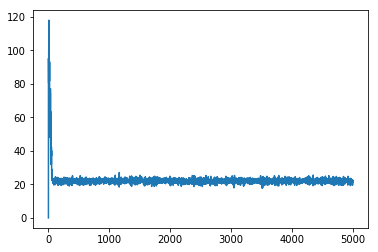

In [84]:
plt.plot(iterations,neg_log_likeli_history)